<a href="https://colab.research.google.com/github/hamzaabialal/data/blob/main/house_Pred_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/BostonHousing_train.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71,26.7
1,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
2,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0
3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
4,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4


In [6]:
y = data[["tax", "medv"]]
x = data.drop(["tax", "medv"], axis = 1)
print("X Null Values: ", y.isnull().sum())
print("Y Null Values: ", x.isnull().sum())

X Null Values:  tax     0
medv    0
dtype: int64
Y Null Values:  crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
ptratio    0
b          0
lstat      0
dtype: int64


In [7]:
print("X Shape: ", x.shape)
print("Y Shape: ", y.shape)

X Shape:  (404, 12)
Y Shape:  (404, 2)


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print("X Train Shape: ", x_train.shape)
print("X Test Shape: ", x_test.shape)
print("Y Train Shape: ", y_train.shape)
print("Y Test Shape: ", y_test.shape)

X Train Shape:  (323, 12)
X Test Shape:  (81, 12)
Y Train Shape:  (323, 2)
Y Test Shape:  (81, 2)


In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10, random_state=50)
model.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, random_state=50)

In [25]:
lr_train_pred = model.predict(x_train)
lr_test_pred = model.predict(x_test)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
print("Train MSE: ", lr_train_mse)
print("Test MSE: ", lr_test_mse)
print("Train R2: ", lr_train_r2)
print("Test R2: ", lr_test_r2)


Train MSE:  54.539047035747146
Test MSE:  402.6531600439693
Train R2:  0.9679635250807876
Test R2:  0.8852058575423207


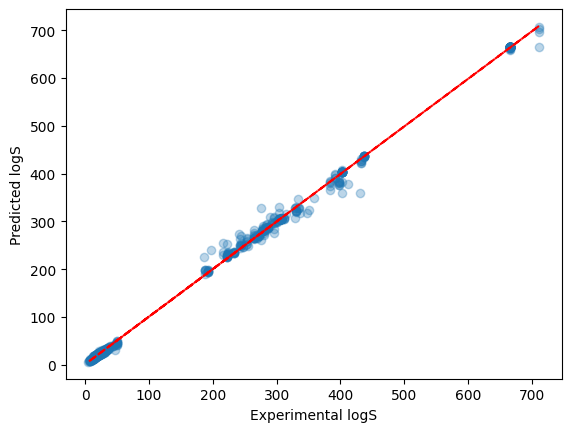

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_train and lr_train_pred are 1D arrays
y_train_1d = np.array(y_train).ravel()
lr_train_pred_1d = np.array(lr_train_pred).ravel()

# Perform polynomial fit
z = np.polyfit(y_train_1d, lr_train_pred_1d, 1)
p = np.poly1d(z)

# Plot the results
plt.plot(y_train_1d, p(y_train_1d), "r--")
plt.scatter(y_train_1d, lr_train_pred_1d, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()
